In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import sys
import os
%matplotlib inline

In [9]:
path = os.path.dirname(os.path.abspath('__file__'))+'\\Prepared_tables\\'
path_saving = os.path.dirname(os.path.abspath('__file__'))+'\\raw_figures\\Figure_5\\'

df = pd.read_csv((path+ 'Prep_Protein Groups_imputed.csv'), low_memory=False)
df['SubMitoLocalization'] = df['SubMitoLocalization'].astype(str)
df['IMPI_new'] = df['IMPI_new'].astype(str)
df['IMPI_new'] = [df['IMPI_new'][i].split(';') for i in range(len(df))]


In [3]:
df_kinase = df[df['Kinase'].astype(str) != 'nan'].reset_index(drop=True)

df_kinase_mito = df_kinase.iloc[[i for i in range(len(df_kinase)) if ('Verified mitochondrial' in df_kinase['IMPI_new'][i] )],:].reset_index(drop= True)
df_kinase_mito = df_kinase_mito.set_index('Gene names')
df_kinase_mito = df_kinase_mito.iloc[:,[i for i in range(len(df_kinase_mito.columns)) if (('Norm_Intensity ' in list(df_kinase_mito.columns)[i]) & ('Norm_Intensity wt' not in list(df_kinase_mito.columns)[i])&('Zscore_' not in list(df_kinase_mito.columns)[i]))]]

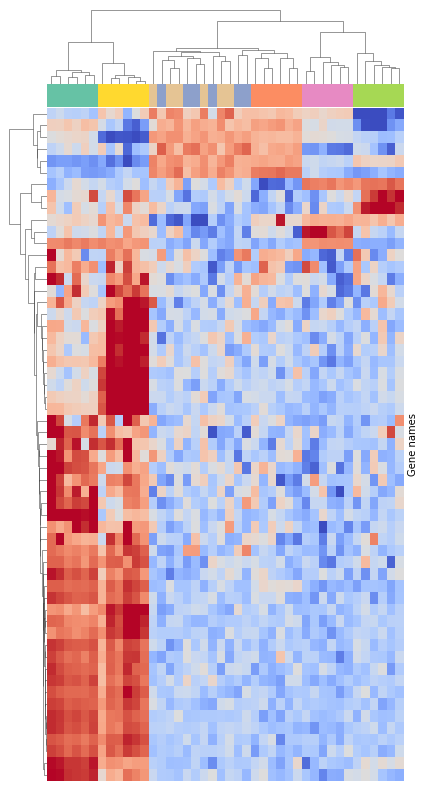

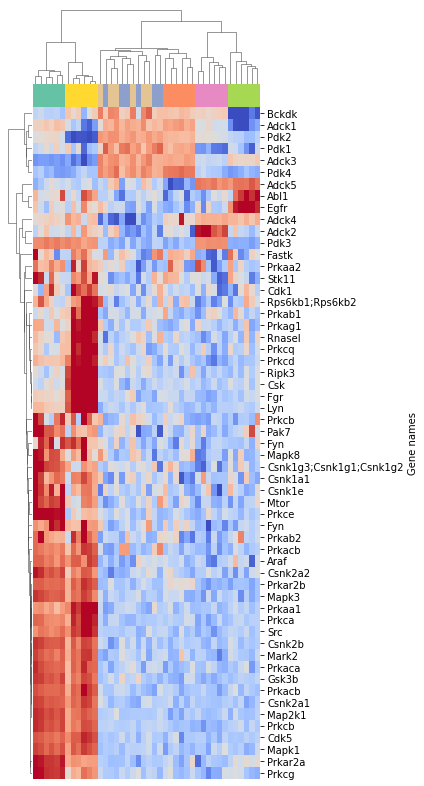

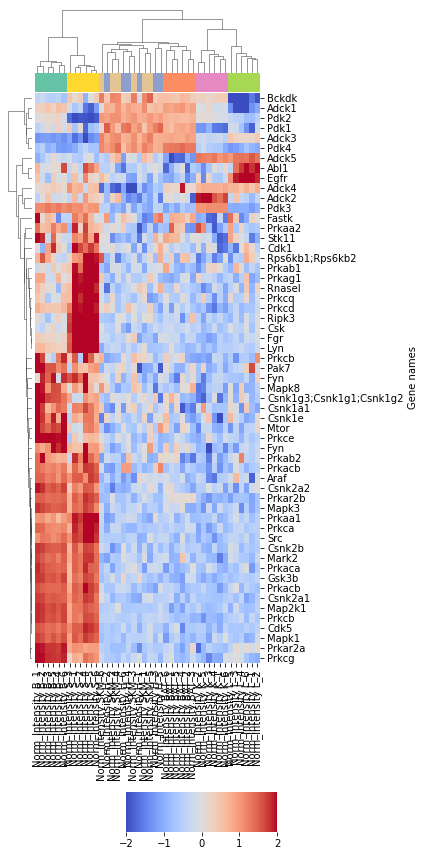

In [22]:
# filter for Kinases
df_kinase = df[df['Kinase'].astype(str) != 'nan'].reset_index(drop=True)
#filter for mitochondrial kinases
df_kinase_mito = df_kinase.iloc[[i for i in range(len(df_kinase)) if (('Verified mitochondrial' in df_kinase['IMPI_new'][i]) or (df_kinase['SubMitoLocalization'][i] != 'nan'))],:].reset_index(drop= True)
#Lauras extra annotation
kinases_Uni = ['O70571','Q9JK42','O55028','Q8BFP9','Q922H2','Q80V03','Q9D0L4','Q6NSR3','Q99MQ3','Q8C725','P05132','P54265','Q5EG47','Q8BRK8','Q9R078','Q8BGM7','Q91WG5','O54950','Q6PAM0','P11440','P49615','P24788','Q8BK63','Q8C4X2','Q9JMK2','Q8BTH8','Q9DC28','Q8BVP5','Q60737','O54833','P67871','Q63844','P63085','Q91Y86','Q5S006','Q9JLN9','Q8C015','P68181','Q8K1M3','P31324','P28867','P20444','P16054','P28867','P68404','Q02956','Q02111','Q62074','P63318','P23298','O08911','P00520','P05480','Q01279','P31750','Q60823','Q9WUA6','Q9WV60','Q99N57','P31938','P25911','P39688','P41241','P14234']
kinase_gene_1 = []
for kin in kinases_Uni:
    a =  [df.iloc[i]['Gene names'] for i in range(len(df)) if kin in df['Majority protein IDs'][i]]
    kinase_gene_1.extend(a)
#combine mito kinase annotation
kinase_gene = list(set(kinase_gene_1+list(df_kinase_mito['Gene names'])))
#prepare table for heatmap
df_Heat_Kin = df.iloc[[i for i in range(len(df)) if df['Gene names'][i] in kinase_gene],:].reset_index(drop= True)
df_Heat_Kin = df_Heat_Kin.set_index('Gene names')
df_Heat_Kin = df_Heat_Kin.iloc[:,[i for i in range(len(df_Heat_Kin.columns)) if (('Norm_Intensity ' in list(df_Heat_Kin.columns)[i]) & ('Norm_Intensity wt' not in list(df_Heat_Kin.columns)[i])&('Zscore_' not in list(df_Heat_Kin.columns)[i]))]]




#make Heatmap
Cluster_color = ['#66c2a5',"#fc8d62","#8da0cb","#e78ac3","#a6d854","#ffd92f","#e5c494"] #colorfull 
#Cluster_color = ['#252525',"#525252","#737373","#969696","#bdbdbd","#d9d9d9","#f0f0f0"] #blacks
col_colors = [Cluster_color[0],
                        Cluster_color[0],
                        Cluster_color[0],
                        Cluster_color[0],
                        Cluster_color[0],
                        Cluster_color[0],
                        Cluster_color[1],
                        Cluster_color[1],
                        Cluster_color[1],
                        Cluster_color[1],
                        Cluster_color[1],
                        Cluster_color[1],
                        Cluster_color[2],
                        Cluster_color[2],
                        Cluster_color[2],
                        Cluster_color[2],
                        Cluster_color[2],
                        Cluster_color[2],
                        Cluster_color[3],
                        Cluster_color[3],
                        Cluster_color[3],
                        Cluster_color[3],
                        Cluster_color[3],
                        Cluster_color[3],
                        Cluster_color[4],
                        Cluster_color[4],
                        Cluster_color[4],
                        Cluster_color[4],
                        Cluster_color[4],
                        Cluster_color[4],
                        Cluster_color[5],
                        Cluster_color[5],
                        Cluster_color[5],
                        Cluster_color[5],
                        Cluster_color[5],
                        Cluster_color[5],
                        Cluster_color[6],
                        Cluster_color[6],
                        Cluster_color[6],
                        Cluster_color[6],
                        Cluster_color[6],
                        Cluster_color[6]
                       ]


#settings for alingment
plot_size_x = 6
plot_size_y = plot_size_x *(42/ len(df_Heat_Kin))*2.5
yticklabels=False
xticklabels=False
cbar_pos=None 
figsize=(plot_size_x, plot_size_y)
dendrogram_ratio=0.1

g_kin = sns.clustermap(df_Heat_Kin, z_score = 0,cmap="coolwarm", metric = 'correlation',figsize=figsize,
                       vmin = -2, vmax=2, col_colors =col_colors, row_cluster=  True, col_cluster=  True,
                       yticklabels=yticklabels,xticklabels=xticklabels,
                       dendrogram_ratio=dendrogram_ratio,
                       cbar_kws={"orientation": "horizontal"},cbar_pos=cbar_pos)
#g_kin.savefig(path_saving+'Mito_Kinase_alignment.pdf', bbox_inches = "tight")


##settings for alingment with label
plot_size_x = 6
plot_size_y = plot_size_x *(42/ len(df_Heat_Kin))*2.5
yticklabels=True
xticklabels=False
cbar_pos=None 
figsize=(plot_size_x, plot_size_y)
dendrogram_ratio=0.1

g_kin = sns.clustermap(df_Heat_Kin, z_score = 0,cmap="coolwarm", metric = 'correlation',figsize=figsize,
                       vmin = -2, vmax=2, col_colors =col_colors, row_cluster=  True, col_cluster=  True,
                       yticklabels=yticklabels,xticklabels=xticklabels,
                       dendrogram_ratio=dendrogram_ratio,
                       cbar_kws={"orientation": "horizontal"},cbar_pos=cbar_pos)
#g_kin.savefig(path_saving+'Mito_Kinase_alignment_w_label.pdf', bbox_inches = "tight")

#settings for total plot
plot_size_x = 6
plot_size_y = plot_size_x *(42/ len(df_Heat_Kin))*2.5
yticklabels=True
xticklabels=True
cbar_pos=(0.3, -.05, .35, 0.05)
figsize=(plot_size_x, plot_size_y)
dendrogram_ratio=0.1

g_kin = sns.clustermap(df_Heat_Kin, z_score = 0,cmap="coolwarm", metric = 'correlation',figsize=figsize,
                       vmin = -2, vmax=2, col_colors =col_colors, row_cluster=  True, col_cluster=  True,
                       yticklabels=yticklabels,xticklabels=xticklabels,
                       dendrogram_ratio=dendrogram_ratio,
                       cbar_kws={"orientation": "horizontal"},cbar_pos=cbar_pos)
#g_kin.savefig(path_saving+'Mito_Kinase_total.pdf', bbox_inches = "tight")


In [5]:

df_Heat_Kin.to_csv((path_saving+ 'df_kinases.csv'))

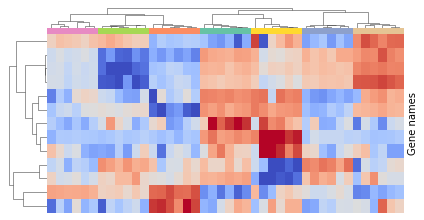

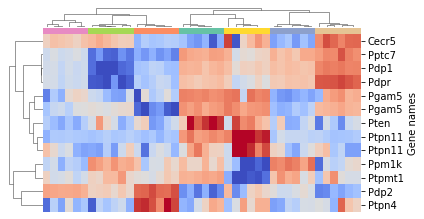

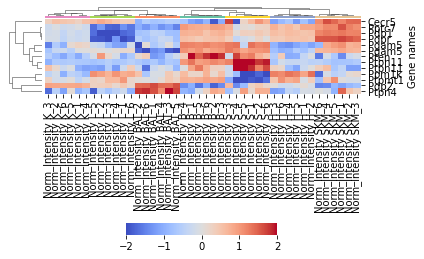

In [6]:
## Heatmat Phosphatases

phosphatases = ['Ptpn11','Ptpn4','Pptc7','Pdp1','Pdp2','Ptpmt1','Ppm1k','Pdpr','Pgam5','Cecr5','Pten']#'Pten',
#phosphatases = kinase_gene
df_phosphatases = df.iloc[[i for i in range(len(df)) if df['Gene names'][i] in phosphatases],:].reset_index(drop= True)
df_phosphatases = df_phosphatases.set_index('Gene names')
df_phosphatases = df_phosphatases.iloc[:,[i for i in range(len(df_phosphatases.columns)) if (('Norm_Intensity ' in list(df_phosphatases.columns)[i]) & ('Norm_Intensity wt' not in list(df_phosphatases.columns)[i])&('Zscore_' not in list(df_phosphatases.columns)[i]))]]

Cluster_color = ['#66c2a5',"#fc8d62","#8da0cb","#e78ac3","#a6d854","#ffd92f","#e5c494"] #colorfull 
#Cluster_color = ['#252525',"#525252","#737373","#969696","#bdbdbd","#d9d9d9","#f0f0f0"] #blacks
col_colors = [Cluster_color[0],
                        Cluster_color[0],
                        Cluster_color[0],
                        Cluster_color[0],
                        Cluster_color[0],
                        Cluster_color[0],
                        Cluster_color[1],
                        Cluster_color[1],
                        Cluster_color[1],
                        Cluster_color[1],
                        Cluster_color[1],
                        Cluster_color[1],
                        Cluster_color[2],
                        Cluster_color[2],
                        Cluster_color[2],
                        Cluster_color[2],
                        Cluster_color[2],
                        Cluster_color[2],
                        Cluster_color[3],
                        Cluster_color[3],
                        Cluster_color[3],
                        Cluster_color[3],
                        Cluster_color[3],
                        Cluster_color[3],
                        Cluster_color[4],
                        Cluster_color[4],
                        Cluster_color[4],
                        Cluster_color[4],
                        Cluster_color[4],
                        Cluster_color[4],
                        Cluster_color[5],
                        Cluster_color[5],
                        Cluster_color[5],
                        Cluster_color[5],
                        Cluster_color[5],
                        Cluster_color[5],
                        Cluster_color[6],
                        Cluster_color[6],
                        Cluster_color[6],
                        Cluster_color[6],
                        Cluster_color[6],
                        Cluster_color[6]
                       ]

#settings for alingment
plot_size_x = 6
plot_size_y = plot_size_x *(12/ len(df_Heat_Kin))*2.5
yticklabels=False
xticklabels=False
cbar_pos=None 
figsize=(plot_size_x, plot_size_y)
dendrogram_ratio=0.1

g_phos = sns.clustermap(df_phosphatases, z_score = 0,cmap="coolwarm", metric = 'correlation',figsize=figsize,
                   vmin = -2, vmax=2, col_colors =col_colors, row_cluster=  True, col_cluster=  True,
                   yticklabels=yticklabels,xticklabels=xticklabels,
                   dendrogram_ratio=dendrogram_ratio,
                   cbar_kws={"orientation": "horizontal"},cbar_pos=cbar_pos)
g_phos.savefig(path_saving+'Mito_Phosphatase_alignment.pdf', bbox_inches = "tight")

##settings for alingment with label
plot_size_x = 6
plot_size_y = plot_size_x *(12/ len(df_Heat_Kin))*2.5
yticklabels=True
xticklabels=False
cbar_pos=None 
figsize=(plot_size_x, plot_size_y)
dendrogram_ratio=0.1

g_phos = sns.clustermap(df_phosphatases, z_score = 0,cmap="coolwarm", metric = 'correlation',figsize=figsize,
                   vmin = -2, vmax=2, col_colors =col_colors, row_cluster=  True, col_cluster=  True,
                   yticklabels=yticklabels,xticklabels=xticklabels,
                   dendrogram_ratio=dendrogram_ratio,
                   cbar_kws={"orientation": "horizontal"},cbar_pos=cbar_pos)
g_phos.savefig(path_saving+'Mito_Phosphatase_alignment_w_label.pdf', bbox_inches = "tight")

#settings for total plot
plot_size_x = 6
plot_size_y = plot_size_x *(12/ len(df_Heat_Kin))*2.5
yticklabels=True
xticklabels=True
cbar_pos=(0.3, -.05, .35, 0.05)
figsize=(plot_size_x, plot_size_y)
dendrogram_ratio=0.1
#

g_phos = sns.clustermap(df_phosphatases, z_score = 0,cmap="coolwarm", metric = 'correlation',figsize=figsize,
                   vmin = -2, vmax=2, col_colors =col_colors, row_cluster=  True, col_cluster=  True,
                   yticklabels=yticklabels,xticklabels=xticklabels,
                   dendrogram_ratio=dendrogram_ratio,
                   cbar_kws={"orientation": "horizontal"},cbar_pos=cbar_pos)
g_phos.savefig(path_saving+'Mito_Phosphatase_total.pdf', bbox_inches = "tight")

In [7]:
df_phosphatases.to_csv((path_saving+ 'df_phosphatases.csv'))